In [3]:
# warning메세지 보류
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
### label : digit

In [28]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [29]:
train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [30]:
test.head()

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4


In [31]:
# 1개의 데이터 예시로 확인하기 
x = train[train['id']==5]
digit = x['digit'].values # 답 숫자
letter = x['letter'].values # 글자모양
img = x.values[:,3:].reshape(28,28).astype(int) # 이미지

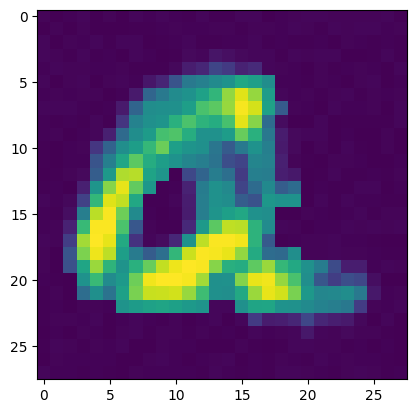

In [32]:
plt.imshow(img)

In [33]:
print(digit,letter)

[6] ['A']


### 데이터 변환

In [49]:
x_train = train.drop(['id','digit','letter'],axis = 1).values
y_train = train['digit'].values

x_test = test.drop(['id','letter'],axis=1).values

In [50]:
x_train.shape, y_train.shape

((2048, 784), (2048,))

In [51]:
x_test.shape

(20480, 784)

In [52]:
# 데이터 정규화
x_train = x_train/255
x_test = x_test/255

### 데이터셋

In [86]:
from torch.utils.data import Dataset 
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch

In [87]:
class dataset(Dataset):
    
    def __init__(self,x_train,y_train):
        self.x_train = x_train
        self.y_train = y_train 
        
    def __len__(self):
        return(self.x_train.shape[0])
    
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_train[idx])
        y = torch.FloatTensor(self.y_train[idx])
        return x, y

In [88]:
data = dataset(x_train,y_train)

In [89]:
Batch = 10
dataload = DataLoader(data, batch_size = Batch, drop_last=True)

### 모델

In [ ]:
class mk_Model(nn.Module):
    
    def __init__(self)